# Ford GoBike System Data Exploration
## by SALMAN FARI
## Introduction
 This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.




## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.shape

(183412, 16)

In [6]:
#Show important information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
#descriptive information
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [9]:
#Check for duplicates
df.duplicated().sum()

0

In [10]:
#Check for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Data Cleaning
Quality Issues
<li> Missing values: start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender
<li> start_time and end_time column are not in the timestamp datatype
<li> start_station_id, bike_id end_station_id is not object in format
<li> user_type, member_gender, bike_share_for_all_trip is not in categorical format
<li> member_birth_year column is in float format
<br>

Tidiness Issues
<li> No month column
<li> No day column
<li> No age column
<li> Duration in seconds tells unclear perception of time
<li> No hour column
<li> No age column
<li> Unrequired columns for analysis and visualization(start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude)

In [11]:
#make a copy of the dataset
df_clean = df.copy()

## Cleaning quality issues


#### `Q1`: Missing values: start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender

### Define
<br>
<br>
Drop all rows that contain missing values

### Code

In [12]:
df_clean.dropna(inplace=True)

### Test

In [13]:
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### `Q2`: start_time and end_time column are not in the timestamp datatype

### Define
<br>
Convert Start_time and end_time column to timestamp

### Code

In [14]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

### Test

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

#### `Q3`: start_station_id, bike_id end_station_id are not in object format

### Define
<br>
Convert start_station_id, bike_id end_station_id to object datatype

### Code

In [16]:
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

### Test

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

#### `Q4`: user_type, member_gender, bike_share_for_all_trip is not categorical format

### Define
<br>
Convert user_type, member_gender, bike_share_for_all_trip to categorical format

### Code

In [18]:
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')

### Test

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

#### `Q5`: member_birth_year column is in float format

### Define
<br>
Convert member_birth_year to float format

### Code

In [20]:
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int')

### Test

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

## Cleaning tidiness issues


#### `T1`: no month column

### Define
<br>
Add a month column to the dataset

### Code

In [22]:
df_clean['month'] = df_clean['start_time'].dt.strftime('%B')

### Test

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

#### `T2`: no day column

### Define
<br>
Add a day column to the dataset

### Code

In [24]:
df_clean['start_day'] = df_clean['start_time'].dt.strftime('%A')

In [25]:
df_clean['end_day'] = df_clean['end_time'].dt.strftime('%A')

### Test

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

#### `T3`: Duration in seconds tells unclear perception of time

### Define
<br>
Create minute column to see a clear perception of time

### Code

In [27]:
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

### Test

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

#### `T4`: no hour column

### Define
<br>
Create start hour and end hour column to also see a clear perception of time

### Code

In [29]:
df_clean['start_hour'] = df_clean['start_time'].dt.hour
df_clean['end_hour'] = df_clean['end_time'].dt.hour

#### `T5`: no age column

### Define
<br>
Create age column from member_birth_year

### Code

In [30]:
df_clean['age'] = 2022 - df_clean['member_birth_year'] 

### Test

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

#### `T5`: Unrequired columns for analysis and visualization(start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude)

### Define
<br>
Drop unrequired columns(start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude)

In [32]:
df_clean.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis=1, inplace=True)

# Store Data

In [32]:
df_clean.to_csv('clean_ford_gobike.csv', index=False)

### What is the structure of your dataset?

This dataset is a dataset about Ford GoBike sytem in a bike-sharing system which covers the greater San Francisco Bay area with 17 features which include duration_sec, start_time, end_time, end_time, start_station_id, start_station_nam, start_station_latitude start_station_longitude end_station_id end_station_name end_station_latitude end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, Age and month .



### What is/are the main feature(s) of interest in your dataset?

The main features include data related to the start and end of a ride. This can be used to calculate when bikes are in high or low demand. There is also ample data related to the users of the bike service including their age, gender, and whether they are a paying member or a casual user.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The start time, end time and time related features

## Univariate Exploration



In [33]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,start_day,end_day,duration_min,start_hour,end_hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,February,Thursday,Friday,869,17,8,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,February,Thursday,Friday,1030,12,5,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,February,Thursday,Friday,608,17,4,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,February,Thursday,Friday,26,23,0,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,February,Thursday,Friday,29,23,0,63


In [34]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
color = sns.color_palette()[0]

### What is the distribution of User type?

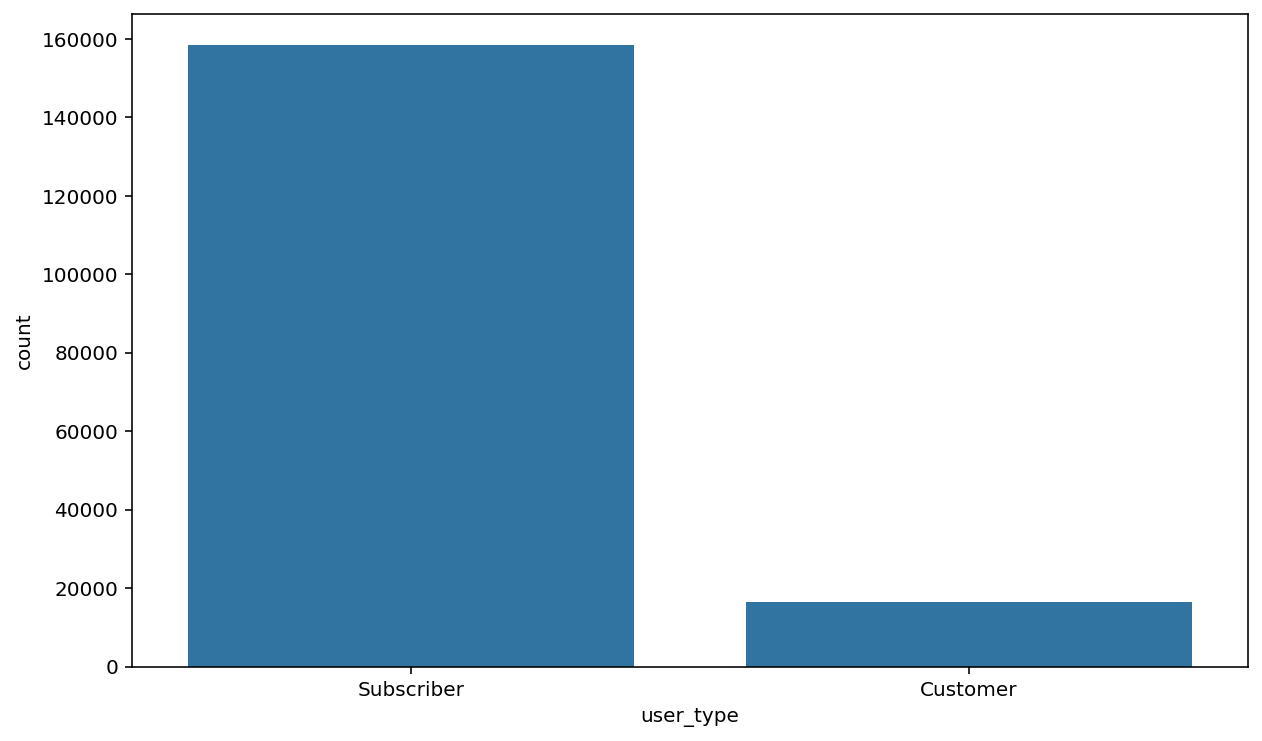

In [35]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.user_type.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `user_type`
sns.countplot(data=df_clean, x='user_type', order=order, color=color);

Most of the users of the system are subscribers

### What is the distribution of gender?

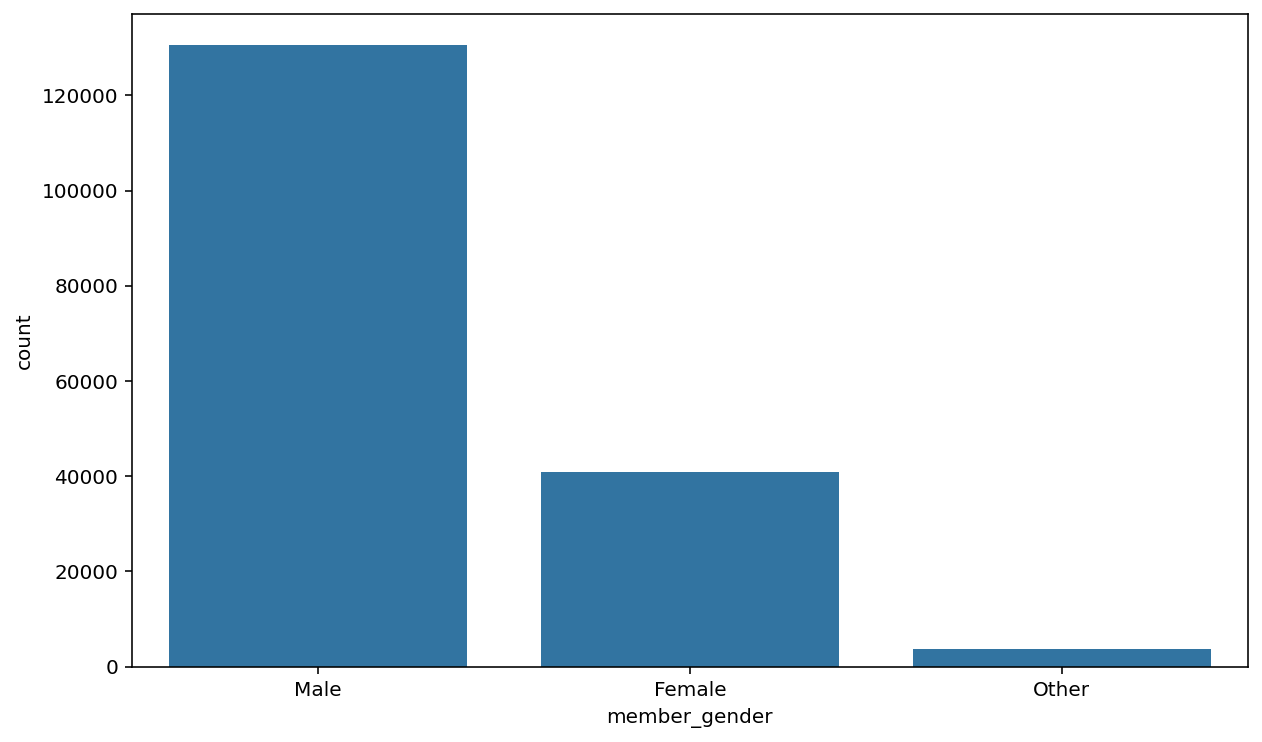

In [36]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.member_gender.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `member_type`
sns.countplot(data=df_clean, x='member_gender', order=order, color=color);

Most of the users of the system are male

### What is the distribution Usage by Minutes?

In [42]:
#Create a function to plot the title and label of a plot
def x_y_t(xL,yL,title):
    plt.title(title, fontweight='bold', fontsize='14')
    plt.xlabel(xL, fontweight='bold')
    plt.ylabel(yL, fontweight='bold')
color = sns.color_palette()[0]

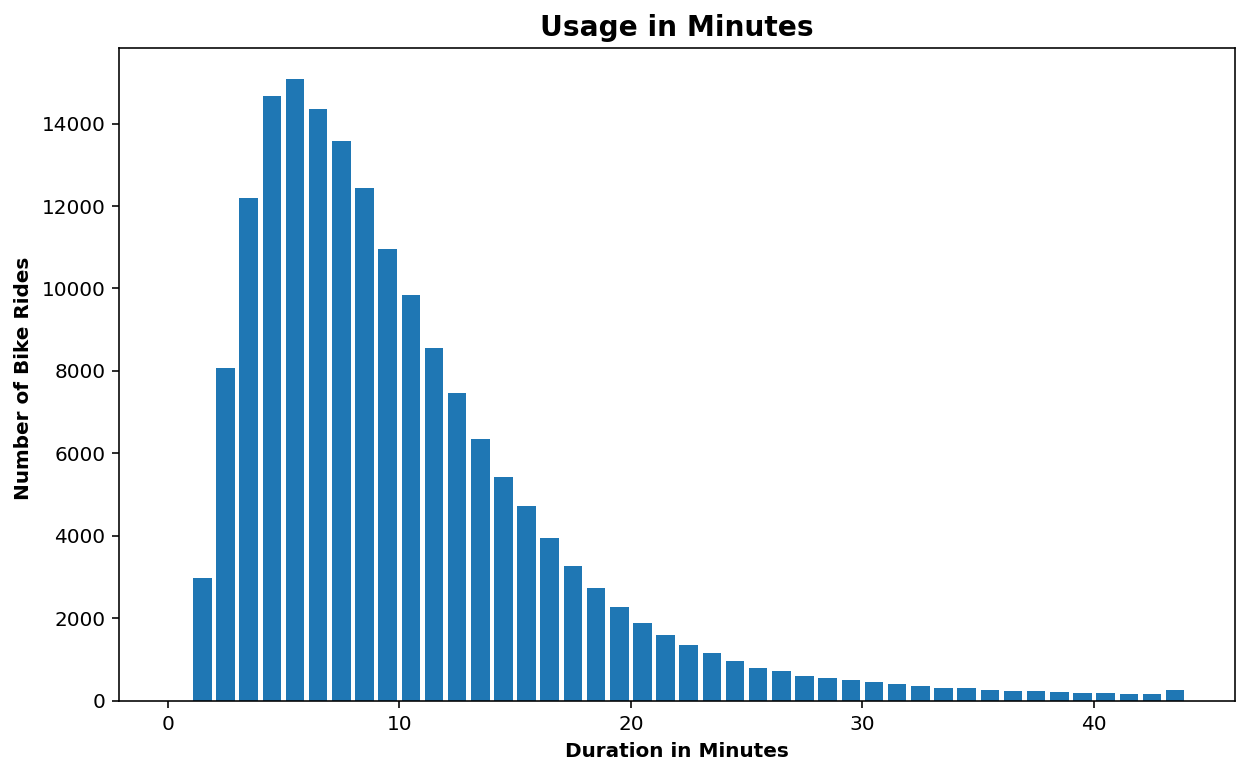

In [40]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Create bins with step-size 5
bins = np.arange(0, 45, 1)
#Change axis limit to see the shape where most data points lie
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['{}'.format(x) for x in ticks]
#plot the histogram
plt.hist(data=df_clean, x='duration_min', bins=bins, rwidth=0.8);
#Set the titles and labels by calling the x_y_t function
x_y_t('Duration in Minutes', 'Number of Bike Rides ', 'Usage in Minutes')

The most duration lies between 2-15 minutes

### What is the distribution Usage by Hour?

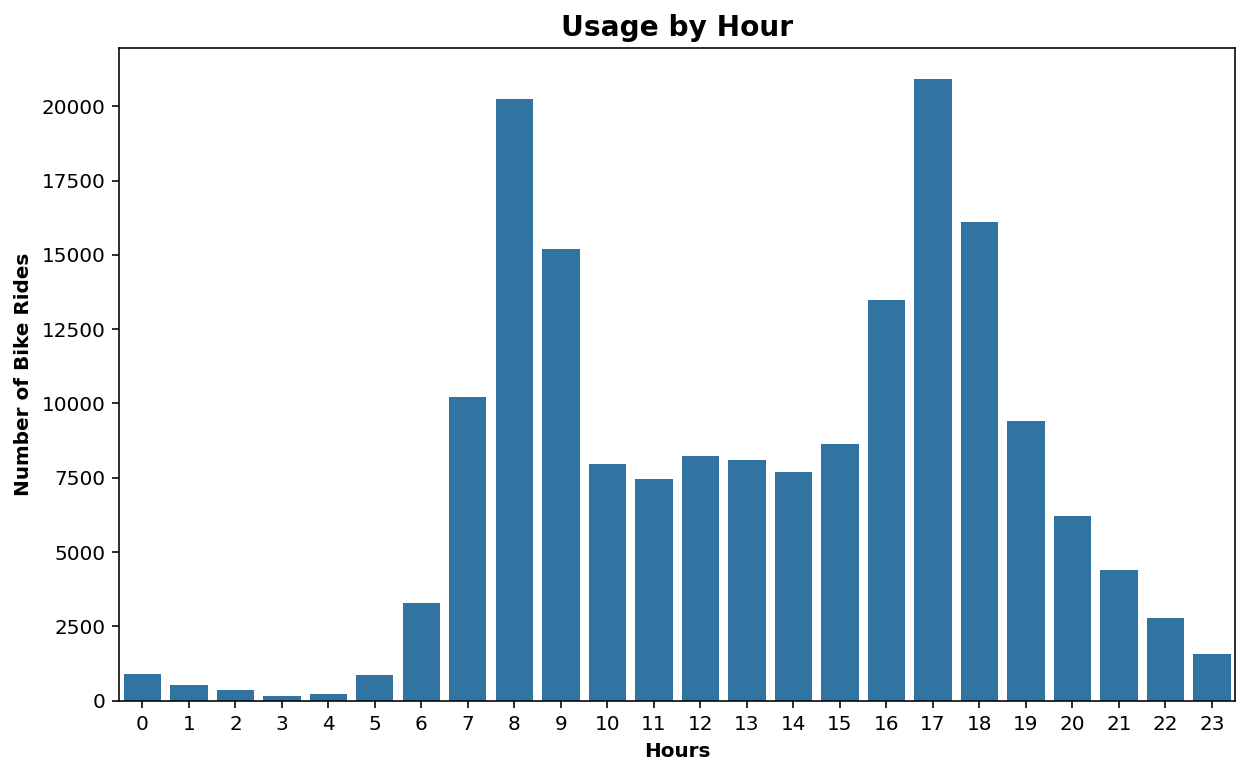

In [43]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

#plot the bar chart on 'start_hour'
sns.countplot(data=df_clean, x='start_hour', color=color);
#Set the title and labels
x_y_t('Hours', 'Number of Bike Rides', 'Usage by Hour');

The most usage of the system is in the morning 8-9am and in the afternoon 5-6pm

### What is the Age distribution?

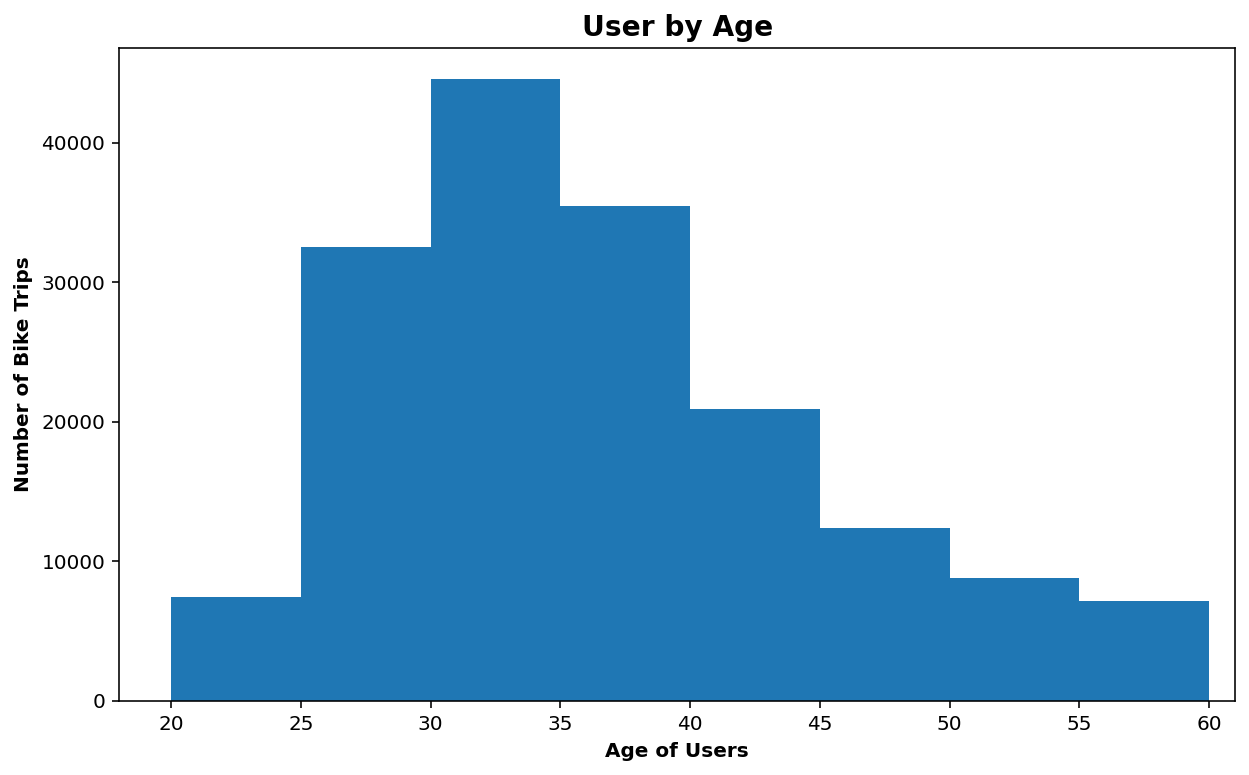

In [44]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
#Create bins to show where the data lie
bins = np.arange(0, 65, 5)
#Plot the histogram of the age 
plt.hist(data = df_clean, x = 'age', bins = bins);
#Set the limit of the values of age you want to display
plt.xlim([18,61])
#Set the title and labels of the plot
x_y_t('Age of Users', 'Number of Bike Trips', 'User by Age')

Most of the users age are between 25-40 years

### What is the distribution Usage by Day?

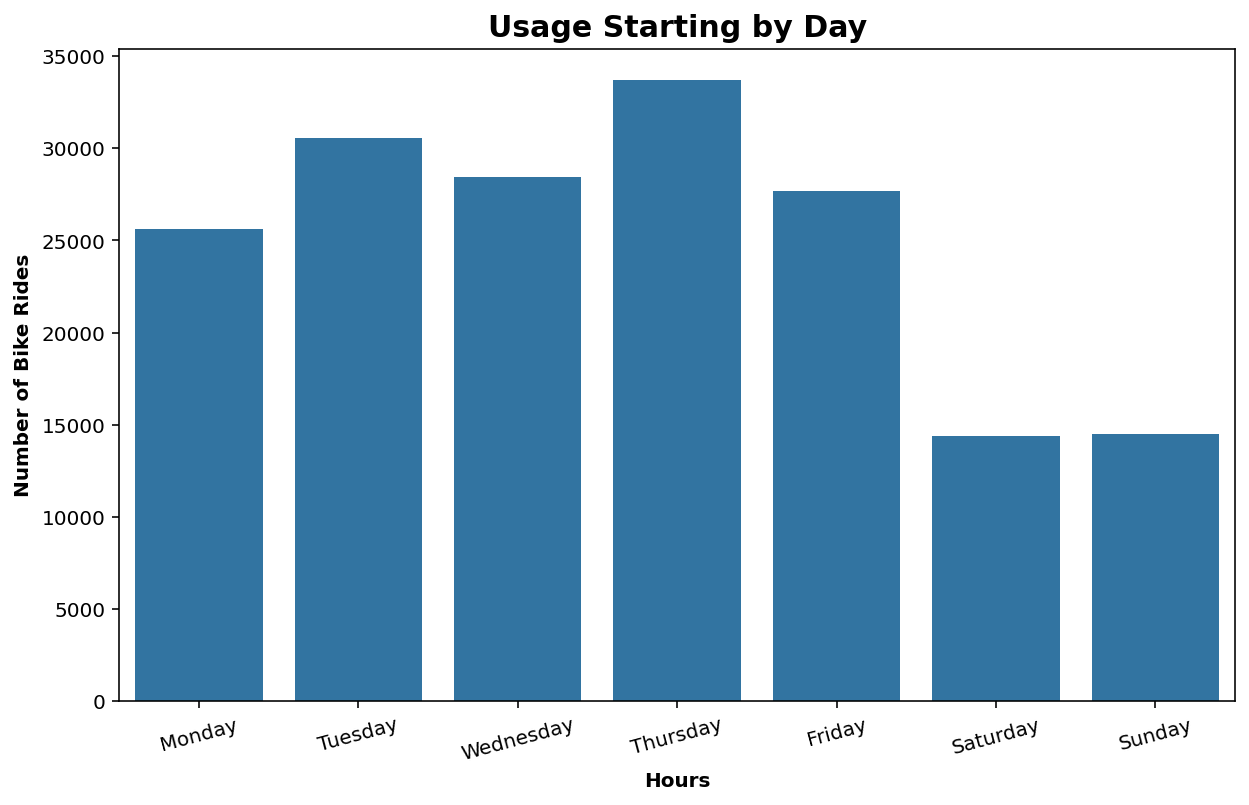

In [53]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
# Get the order of the days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Plot the bar chart in the decreasing order of the frequency of the `start_day`
sns.countplot(data=df_clean, x='start_day', color=color, order=order);
#Set the title and labels of the plot
x_y_t('Hours', 'Number of Bike Rides', 'Usage Starting by Day')
plt.title('Usage Starting by Day', fontsize=15, fontweight='bold')
#Rotate the xlabel ticks to show the ticks clearly
plt.xticks(rotation=15);


The most of the users uses the system on Thursday and Tuesday.

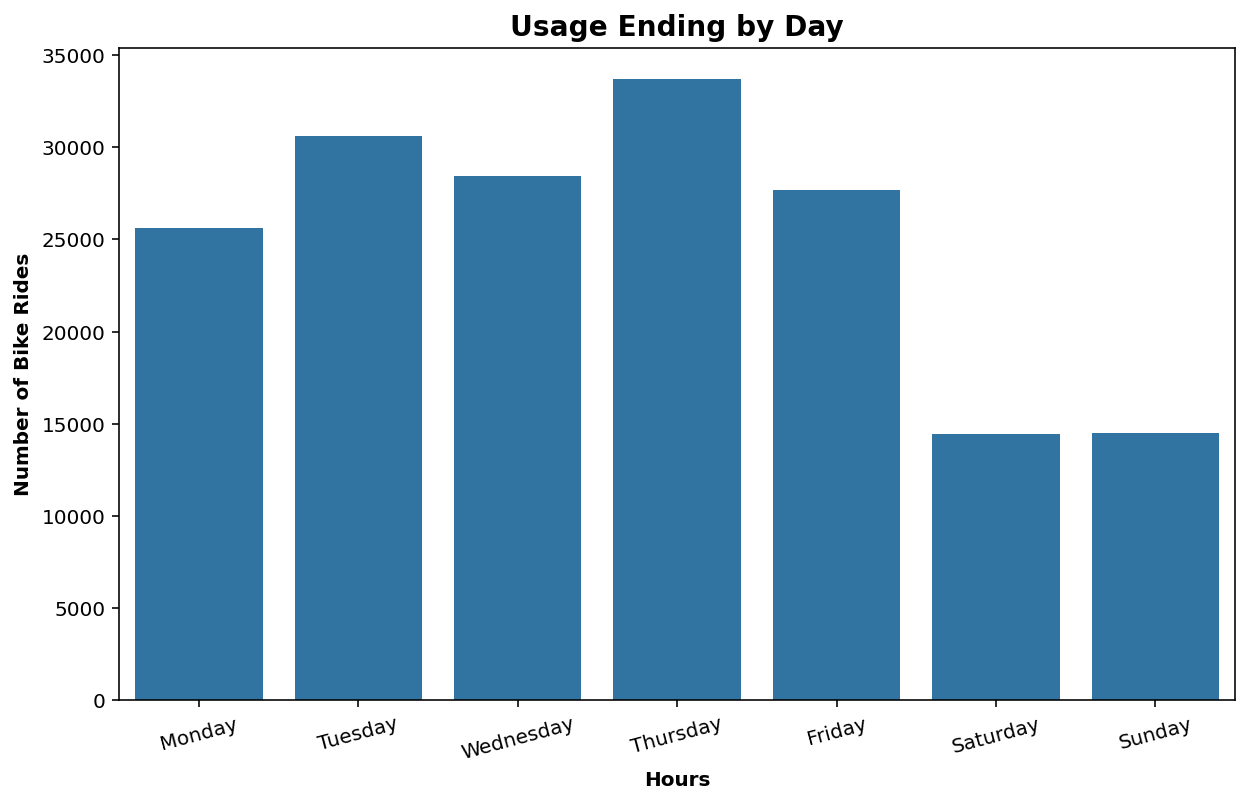

In [54]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the order of the days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Plot the bar chart in the decreasing order of the frequency of the `end_day`
sns.countplot(data=df_clean, x='end_day', color=color, order=order);
#Set the title and labels of the plot
x_y_t('Hours', 'Number of Bike Rides', 'Usage Ending by Day')
#Rotate the xlabel ticks to show the ticks clearly
plt.xticks(rotation=15);

### What is the most popular Station?

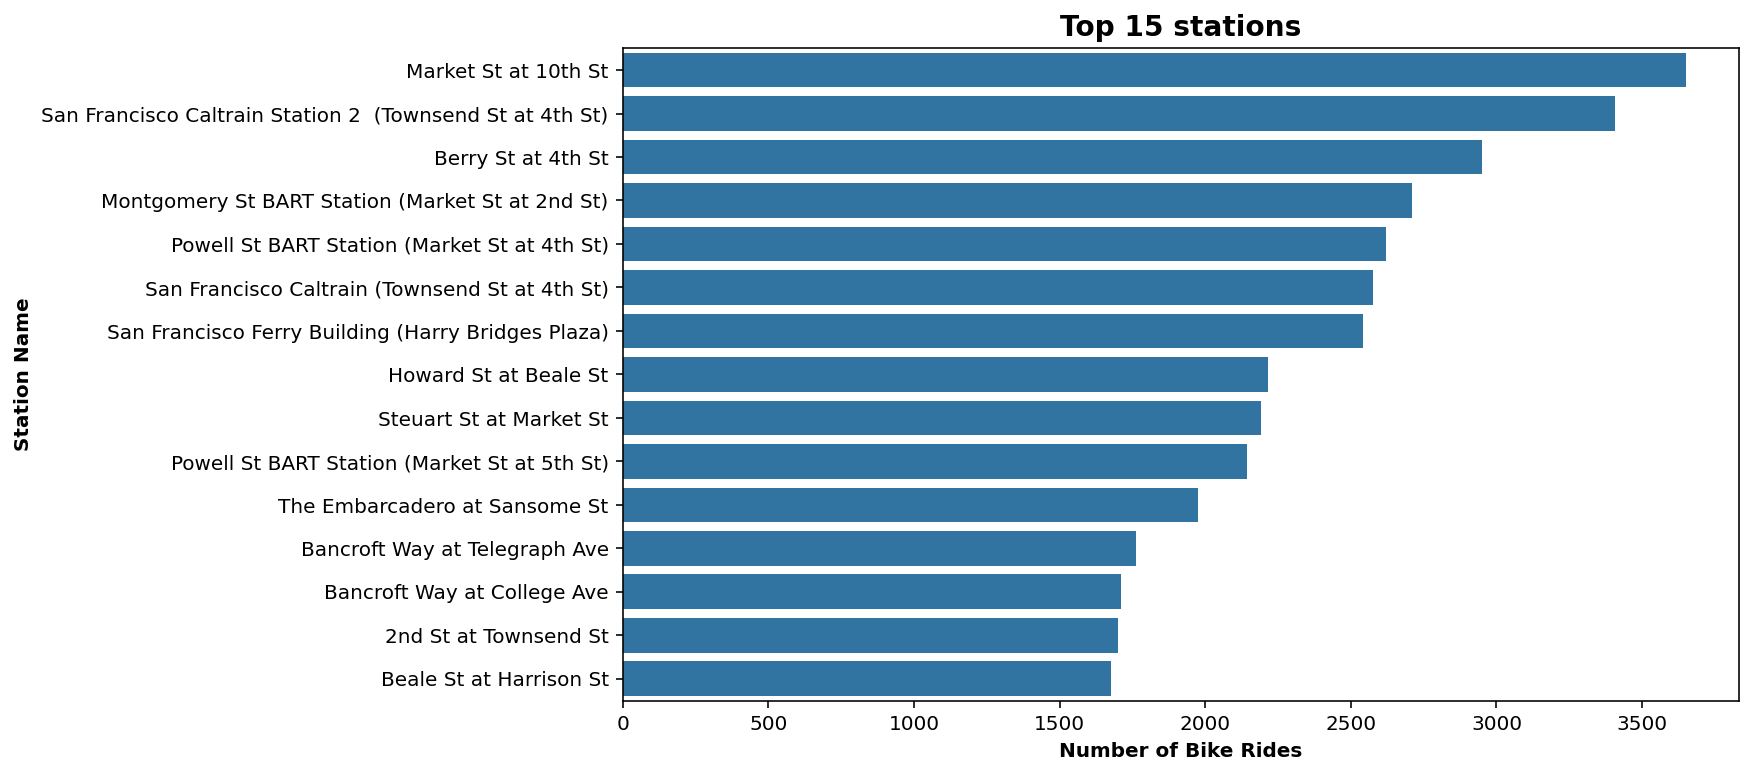

In [47]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series of the first 15 rows
order = df_clean.start_station_name.value_counts().head(15).index
# Plot the bar chart in the decreasing order of the frequency of the `start_station_name`
sns.countplot(data=df_clean, y='start_station_name', color=color, order=order)
#Set the title and label
x_y_t('Number of Bike Rides', 'Station Name', 'Top 15 stations')

Market St at 10th st is the most popular station.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There was not any unusal points. There was no need for any transformations due to the cleaning process that we did earlier.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Nothing seems out of the ordinary. 

## Bivariate Exploration


### Is there relationship between User type and time of trip?

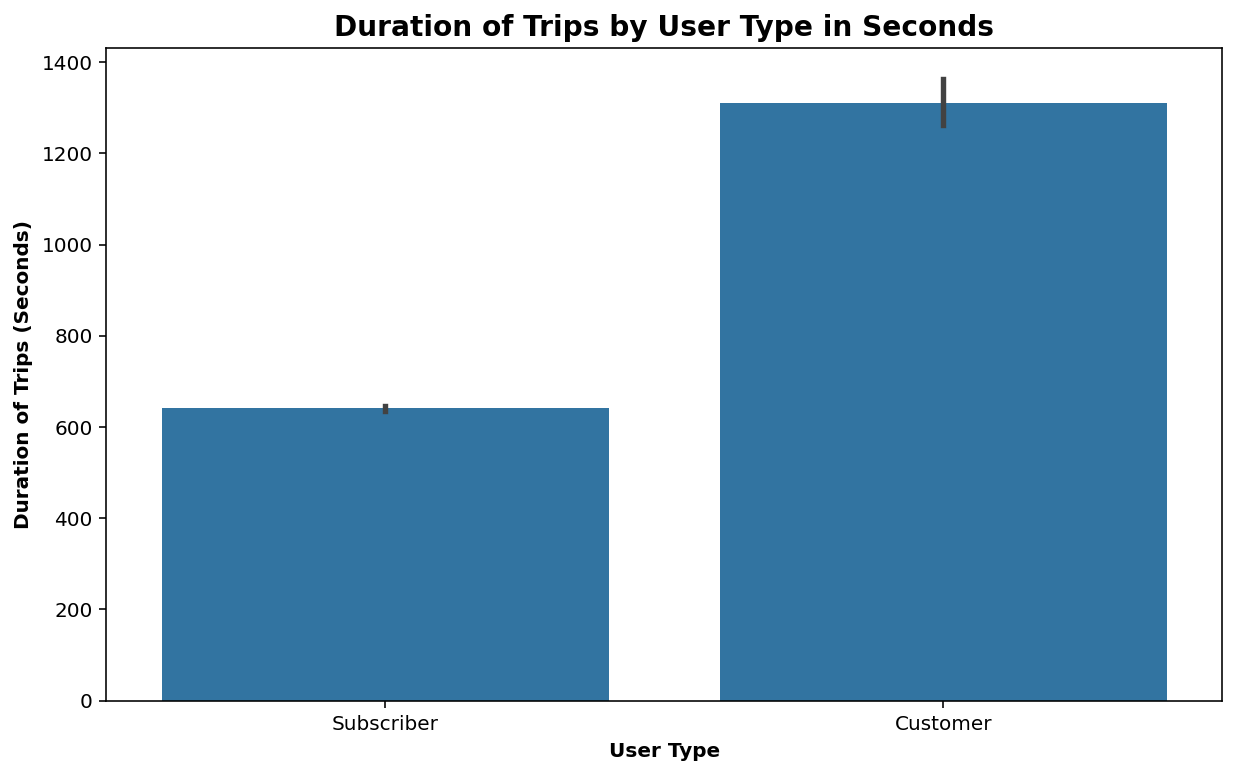

In [50]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.user_type.value_counts().index
# Plot the bar chart of `user_type` and 'duration_sec'
sns.barplot(data=df_clean, x='user_type', y='duration_sec', color=color, order=order);
#set the title and label
x_y_t('User Type', 'Duration of Trips (Seconds)', 'Duration of Trips by User Type in Seconds')

Customer spends more time than Subscribers

### What is the distribution between Ages and Type of User?

<Figure size 720x432 with 0 Axes>

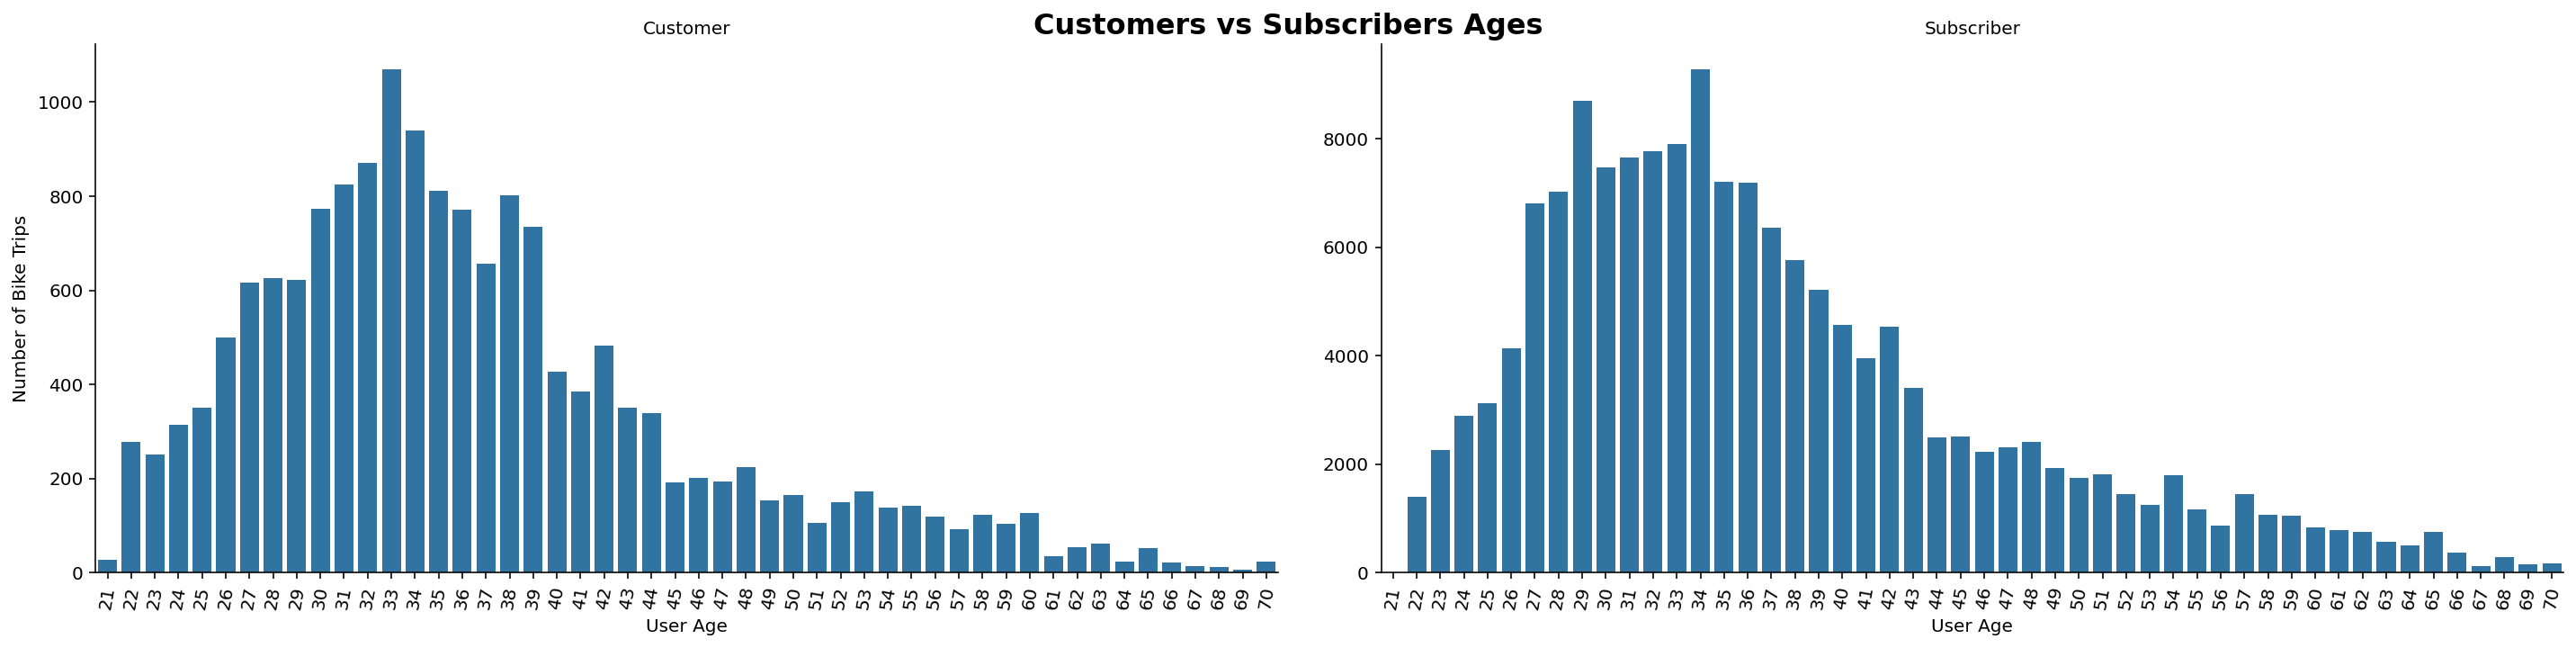

In [74]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

#plot the distribution of user type usage by age
plot = sns.catplot(data = df_clean.query('age <= 70'), x = 'age', col='user_type', kind='count', sharey = False, color = color, height=5, aspect=2);
#Set the title and labels
plot.set_axis_labels('User Age', 'Number of Bike Trips')
plot.set_titles('{col_name}')
plot.fig.suptitle('Customers vs Subscribers Ages', fontsize=16, fontweight='bold');
plot.set_xticklabels(rotation=80);


Customers mostly have younger users. Subscribers have wider range of users.

### Does trip duration depend on User type?

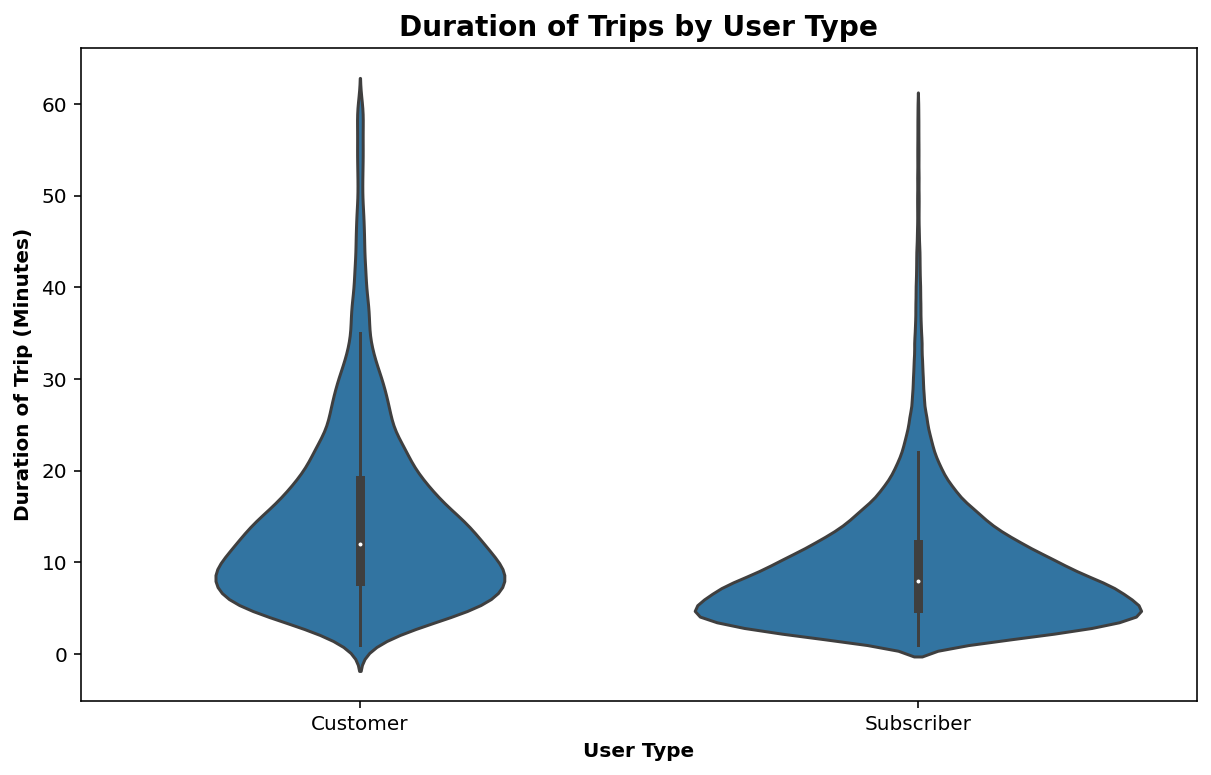

In [51]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
#Plot the violin plot of 'user_type' and 'duration_min
sns.violinplot(data=df_clean.query('duration_min <= 60'), x='user_type', y='duration_min', color=color);
#Set the title and labels
x_y_t('User Type', 'Duration of Trip (Minutes)', 'Duration of Trips by User Type')

At duration less than 60 minutes, Subscribers tends to have lower duration than customers. Let's take a deeper look

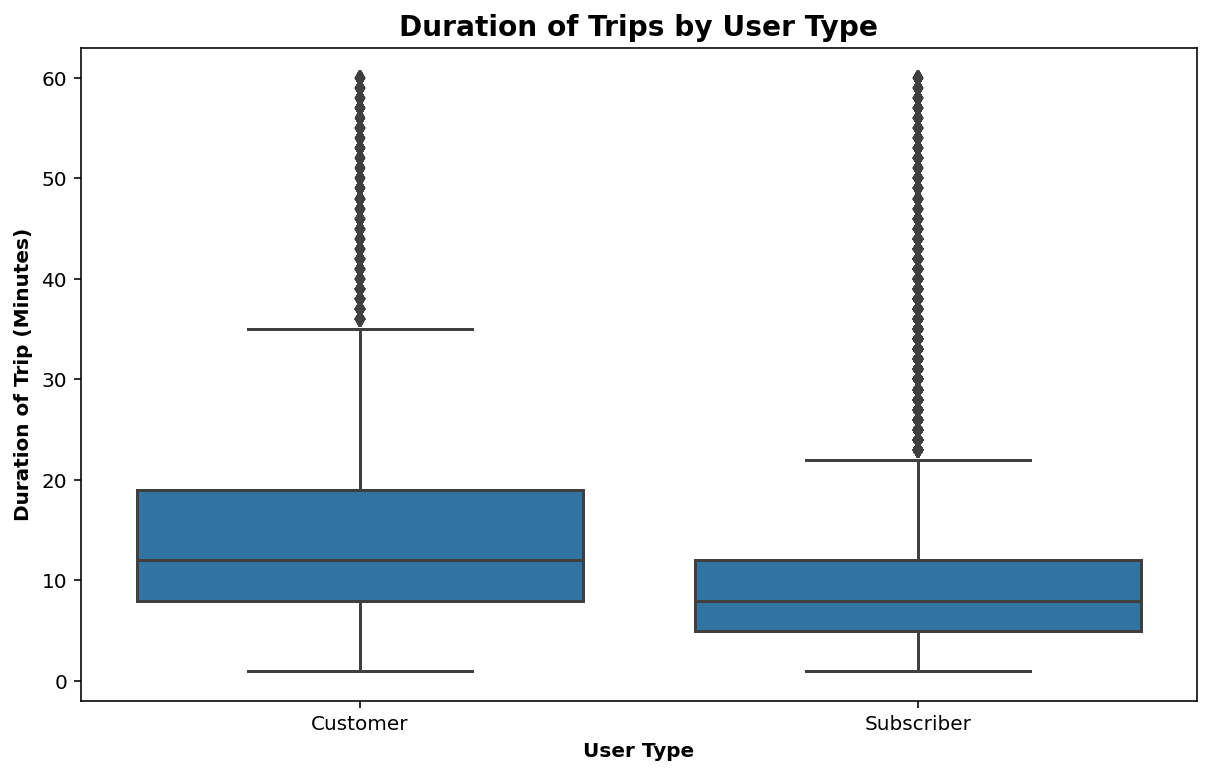

In [52]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

#Plot the box plot of 'user_type' and 'duration_min
sns.boxplot(data=df_clean.query('duration_min <= 60'), x='user_type', y='duration_min', color=color);
#Set the title and labels
x_y_t('User Type', 'Duration of Trip (Minutes)', 'Duration of Trips by User Type')

We explore more of the relationship between duration and user type here and subscribers have lower median and distribution of duration than Customers

### What is the distribution between Start Hour and User Type?

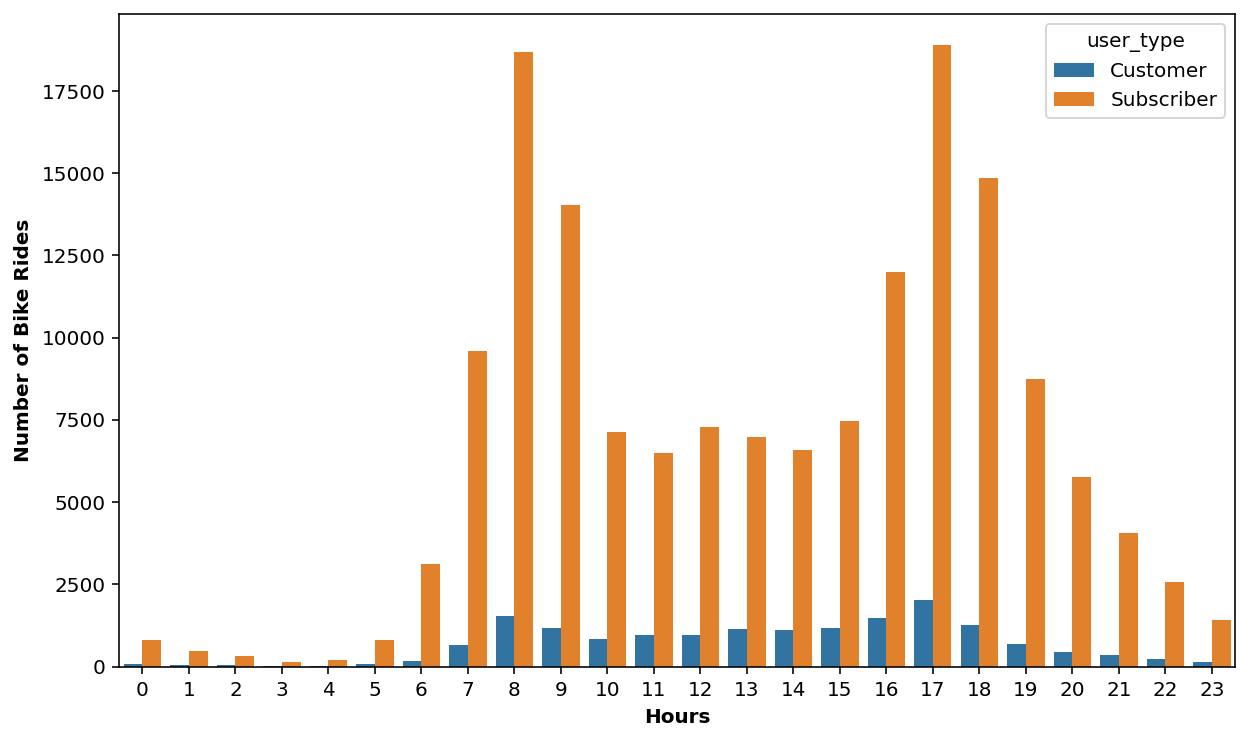

In [71]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
#Plot the bar plot of 'start_hour' by 'user_type'
sns.countplot(data=df_clean, x='start_hour', hue='user_type')
#Set the xlabel and ylabel
plt.xlabel('Hours', fontweight='bold')
plt.ylabel('Number of Bike Rides', fontweight='bold');

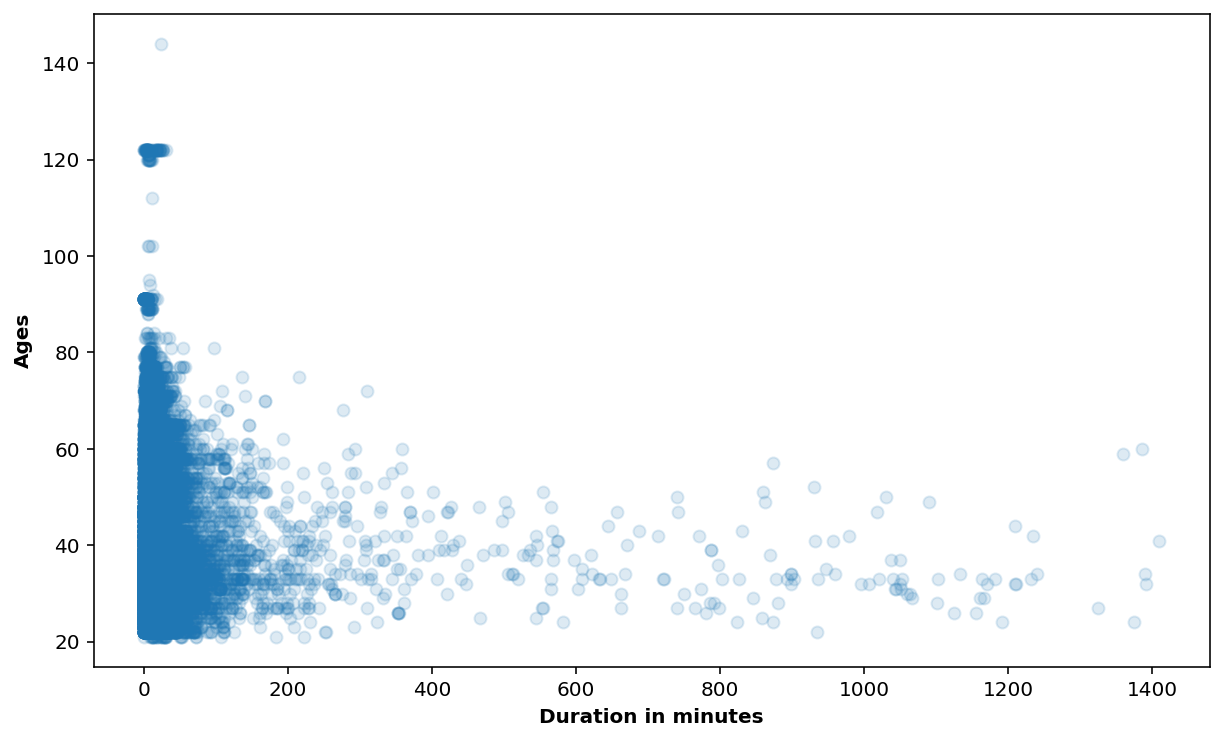

In [60]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
#Plot the scatter plot of 'duration_min' and 'age
plt.scatter(data=df_clean, x='duration_min' ,y='age', alpha=3/20);
#Set the xlabel and ylabel
plt.xlabel('Duration in minutes', fontweight='bold')
plt.ylabel('Ages', fontweight='bold');

All ages tends to spend less 200 minutes for trips

### Is there a relationship between Age and Gender

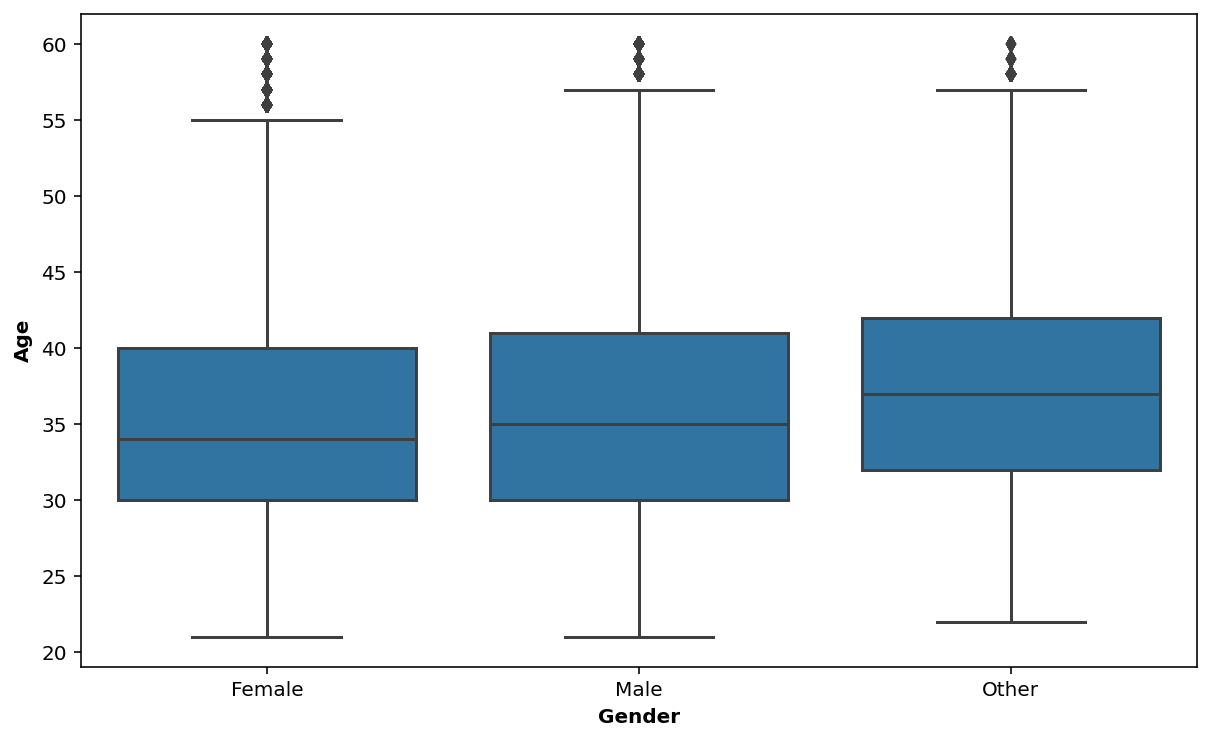

In [72]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
#Plot the box plot of 'member_gender' and 'age' less than or equal to 60
sns.boxplot(data=df_clean.query('age <= 60'), x='member_gender', y='age', color=color)
#Set the xlabel and ylabel
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Age',  fontweight='bold');

There is not much difference in age between male and female 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are a lot more subscriber usage than customers. It shows that subscribers mostly uses the system to commute to work especially in the morning hours and afternoon hours (going to work in the morning and going back to home from work). Also all user ages tend to spend less than 200 minutes for trips. Subscribers have wider range of ages and it makes sense because most of subscribers are working class using the system to commute to work. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

On an average, subscribers are little older than customers. Also male are a bit older than female.

## Multivariate Exploration


### What is the Average Duration of Trip During the Week between Gender?

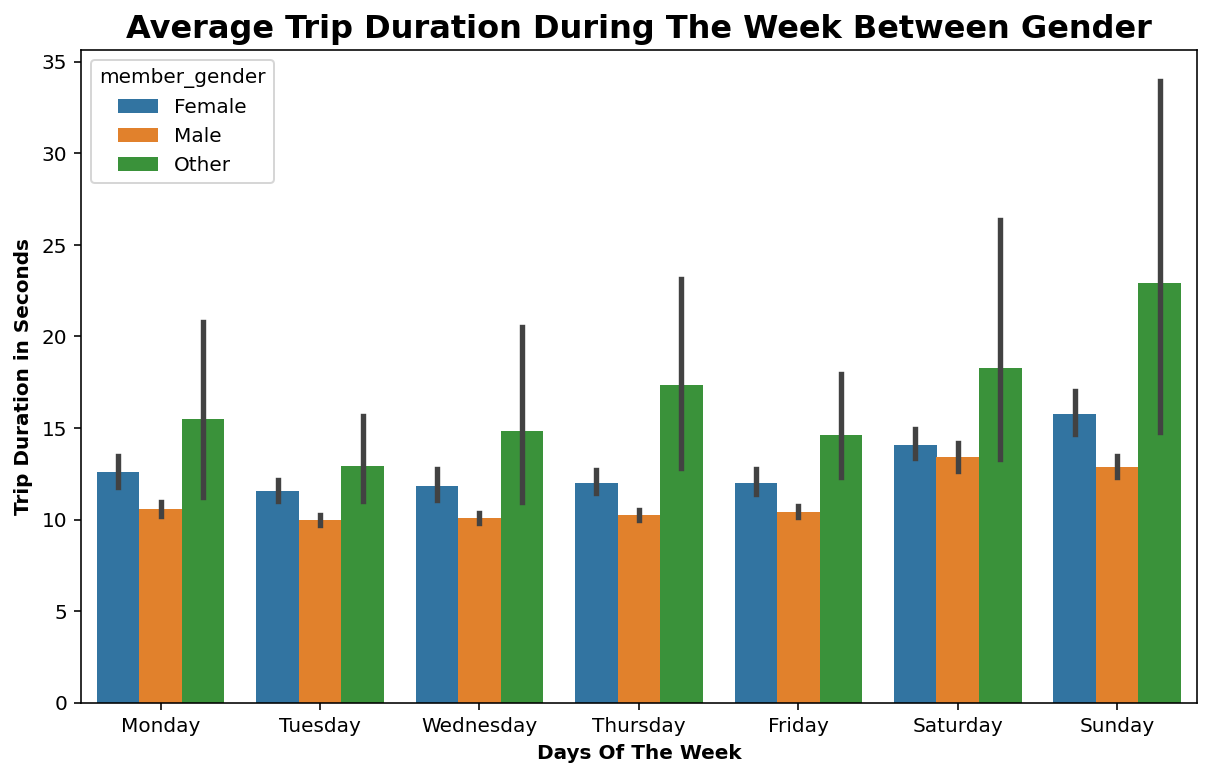

In [55]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the order of the days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#Plot the bar plot of 'start_day', and 'duration_min' by 'member_gender'
sns.barplot(data=df_clean, x='start_day' , y='duration_min', hue='member_gender', order=order)
plt.xlabel('Days Of The Week', fontweight='bold')
plt.ylabel('Trip Duration in Seconds', fontweight='bold')
plt.title('Average Trip Duration During The Week Between Gender', fontsize=16, fontweight='bold');

Males have more average trips than female during the week. But on Sunday there is no  much difference

### What is the Average Duration of Trip between Customers and Subscribers?

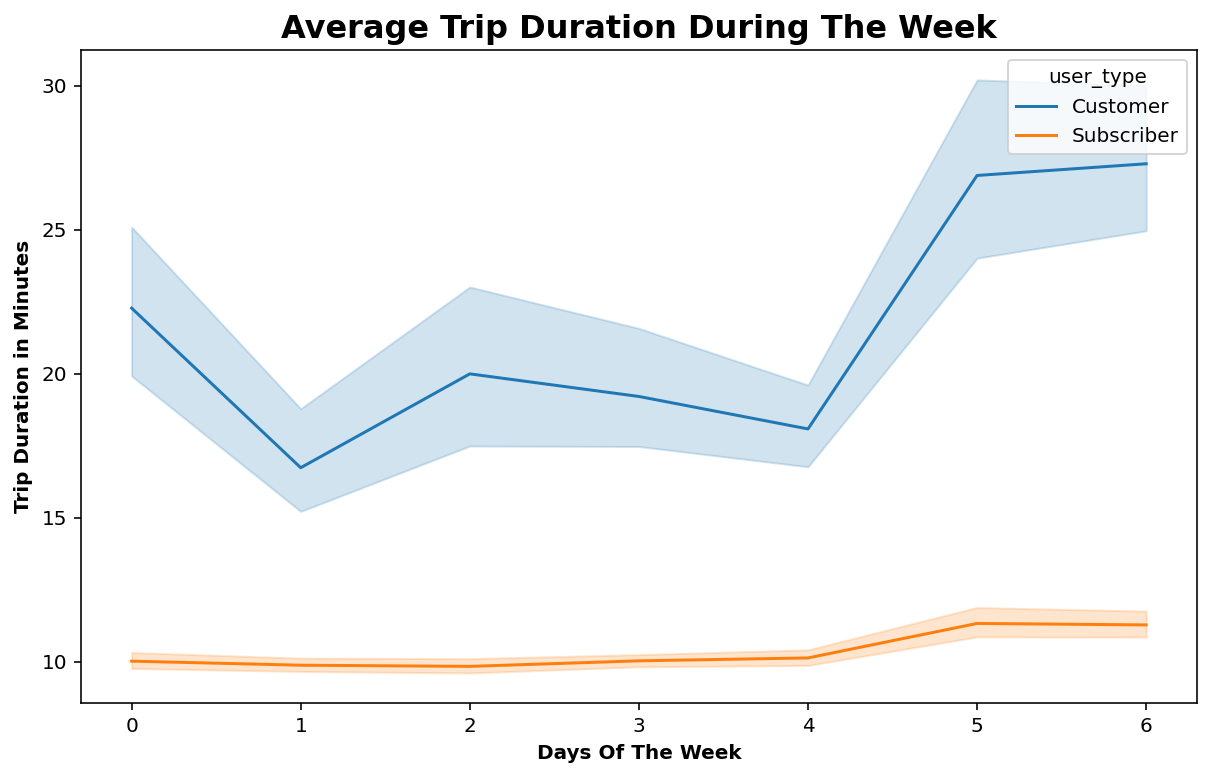

In [59]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

df_clean["days"] = df_clean['start_time'].dt.dayofweek
#Plot the line plot of 'start_day' and 'duration_min' by 'user_type'
sns.lineplot(data=df_clean, x='days' , y='duration_min', hue='user_type')
plt.xlabel('Days Of The Week', fontweight='bold')
plt.ylabel('Trip Duration in Minutes', fontweight='bold')
plt.title('Average Trip Duration During The Week', fontsize=16, fontweight='bold');

The duration of trips is higher during the weekends

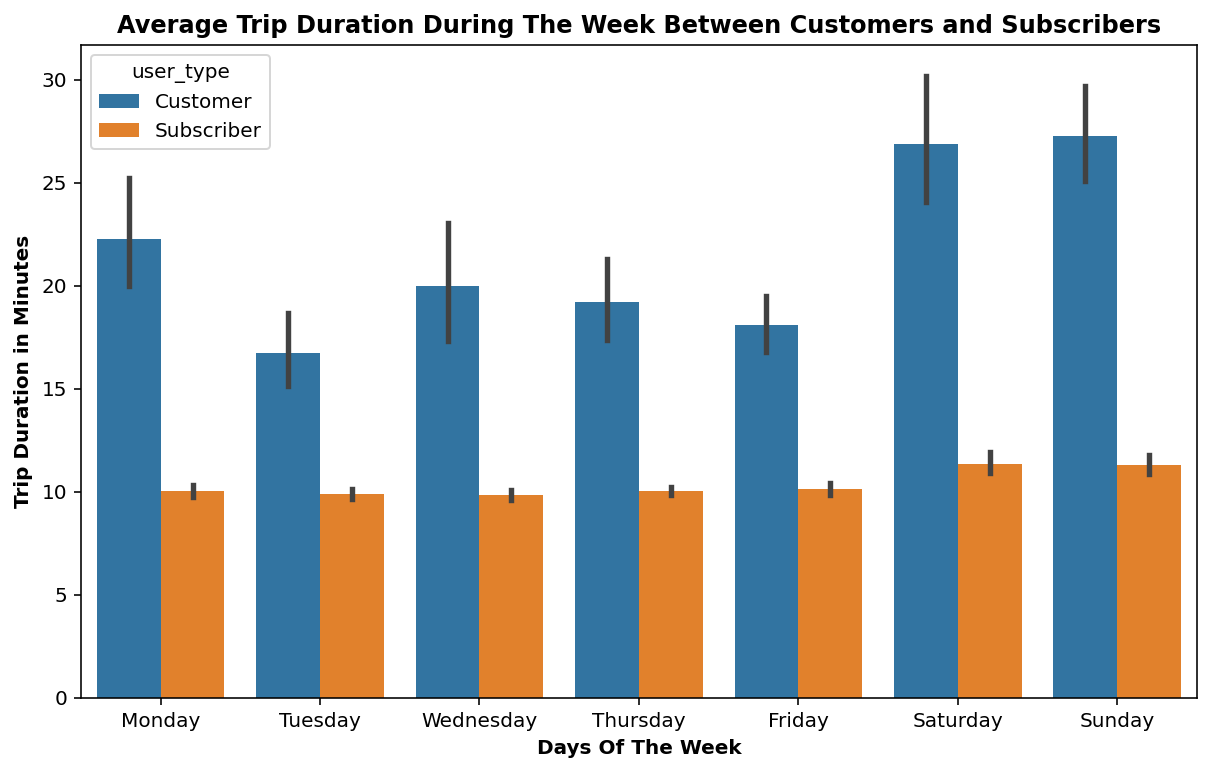

In [56]:
plt.figure(figsize=[10,6])

# Get the order of the days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df_clean, x='start_day' , y='duration_min', hue='user_type', order=order)
plt.xlabel('Days Of The Week', fontweight='bold')
plt.ylabel('Trip Duration in Minutes', fontweight='bold')
plt.title('Average Trip Duration During The Week Between Customers and Subscribers', fontsize=12, fontweight='bold');

Customers have more average trips than Subscribers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of trip duration between gender and customer type. Plotting bar plot of weekdays on gender and customer type based on duration shed a new light on the time based discussion on when and what time each user group uses the bike sharing system and the customers and male spend more time that the others

### Were there any interesting or surprising interactions between features?

There was not any big surprise observed. It'd be interesting to see how male and female use the system differently if there were more female data.

## Conclusions
The  theFord GoBike System is an easy and convenient way of moving around in the city, both for enjoyment and work. There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area
